Chicago Crime 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [9]:
df = pd.read_csv("Crimes_-_2001_to_Present.csv")  
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


Data Cleaning

In [13]:
# Check for duplicates
print("Duplicates before:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Example: Fill missing values or drop columns with too many missing values
df['Location Description'] = df['Location Description'].fillna('Unknown')
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)  # if Latitude/Longitude missing, drop


Duplicates before: 0
Missing values:
 ID                           0
Case Number                  3
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    605595
Community Area          604274
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64


Filtering Data

In [15]:
# Crimes after 2015
df_recent = df[df['Year'] >= 2015]

# Filter for THEFT and BATTERY
df_filtered = df_recent[df_recent['Primary Type'].isin(['THEFT', 'BATTERY'])]


Sorting Data

In [17]:
# Sort by Date
df_sorted = df_filtered.sort_values(by='Date', ascending=True)

# Sort by most frequent crime type
crime_counts = df_filtered['Primary Type'].value_counts()
print(crime_counts)


Primary Type
THEFT      467787
BATTERY    392623
Name: count, dtype: int64


Visualization (At least 5 charts)

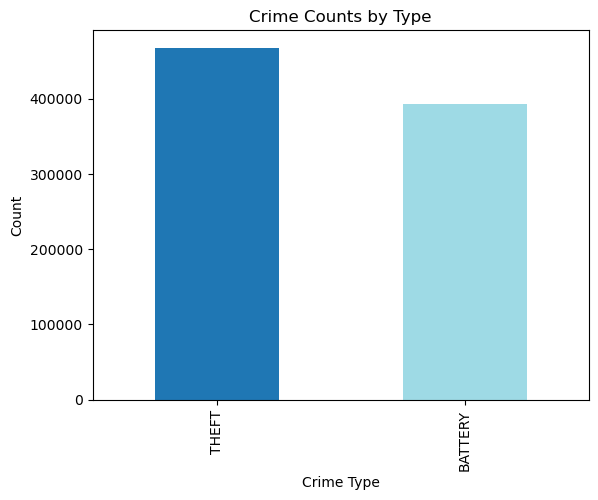

In [62]:
import matplotlib.cm as cm
import numpy as np
colors = cm.tab20(np.linspace(0, 1, len(crime_counts)))
df_filtered['Primary Type'].value_counts().plot(kind='bar',color=colors)
plt.title('Crime Counts by Type')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()


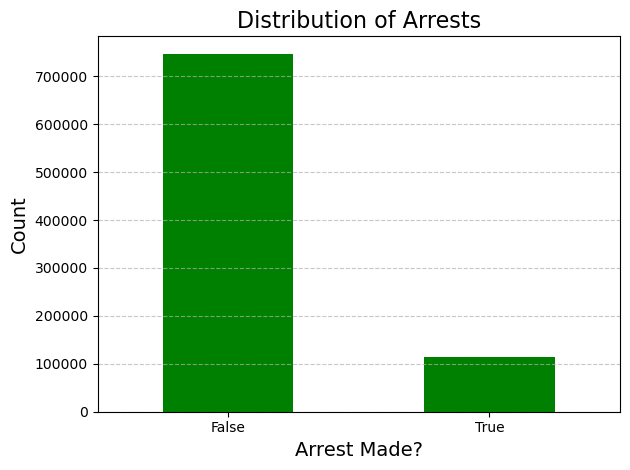

In [64]:
df_filtered['Arrest'].value_counts().plot(kind='bar', color='green')

plt.title('Distribution of Arrests', fontsize=16)
plt.xlabel('Arrest Made?', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)  # Keep labels straight
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light horizontal grid
plt.tight_layout()
plt.show()


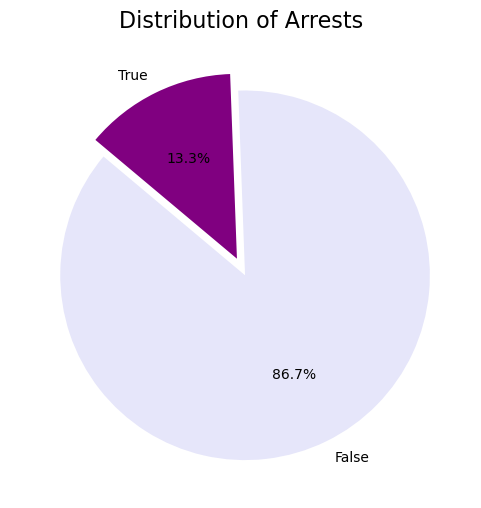

In [66]:
# Pie chart for Arrests
colors = ['lavender', 'purple']  # Colors: first for 'False', second for 'True'

df_filtered['Arrest'].value_counts().plot(
    kind='pie',
    colors=colors,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,
    figsize=(6,6),
    explode=(0.05, 0.05)  # Small separation between slices
)

plt.title('Distribution of Arrests', fontsize=16)
plt.ylabel('')  # Hide y-axis label
plt.show()


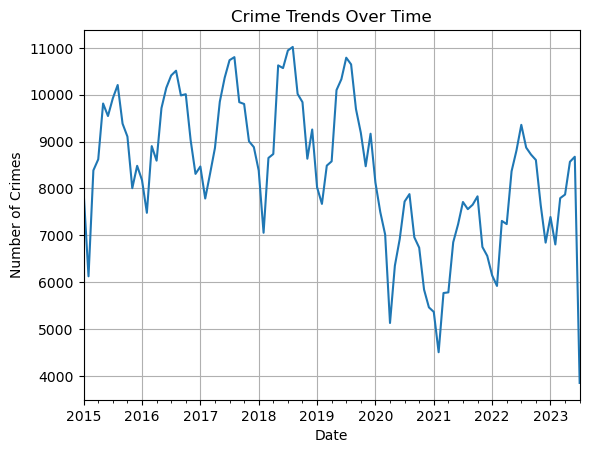

In [49]:
# Convert Date to datetime
df_filtered.loc[:, 'Date'] = pd.to_datetime(df_filtered['Date'])

# Set Date as index and plot
df_filtered.set_index('Date').resample('ME').size().plot()
plt.title('Crime Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


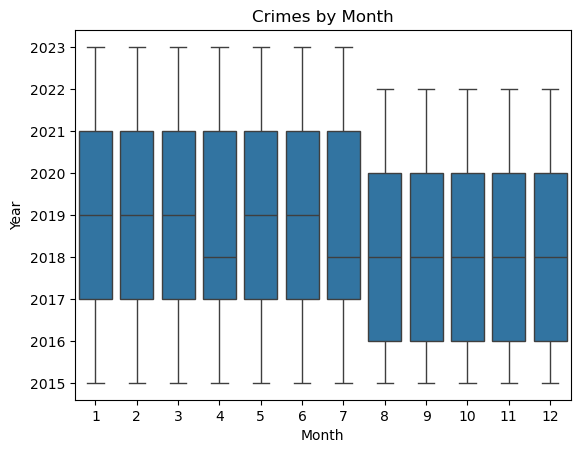

In [51]:
df_filtered.loc[:, 'Month'] = df_filtered['Date'].dt.month
sns.boxplot(x='Month', y='Year', data=df_filtered)
plt.title('Crimes by Month')
plt.show()


C:\Users\rangi\AppData\Local\Temp\ipykernel_11068\3357041314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['Date'].dt.month
C:\Users\rangi\AppData\Local\Temp\ipykernel_11068\3357041314.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


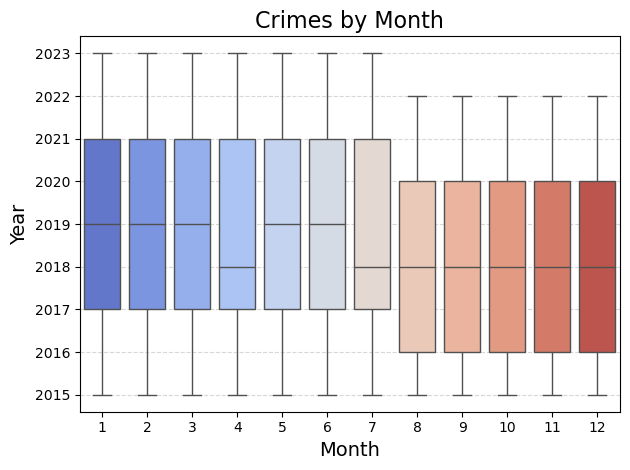

In [80]:
# Add Month column again if needed
df_filtered['Month'] = df_filtered['Date'].dt.month

# Use colorful palette
sns.boxplot(
    x='Month', 
    y='Year', 
    data=df_filtered, 
   palette='coolwarm' # 🎨 Adds gradient colors
)

plt.title('Crimes by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Optional: light grid
plt.tight_layout()
plt.show()


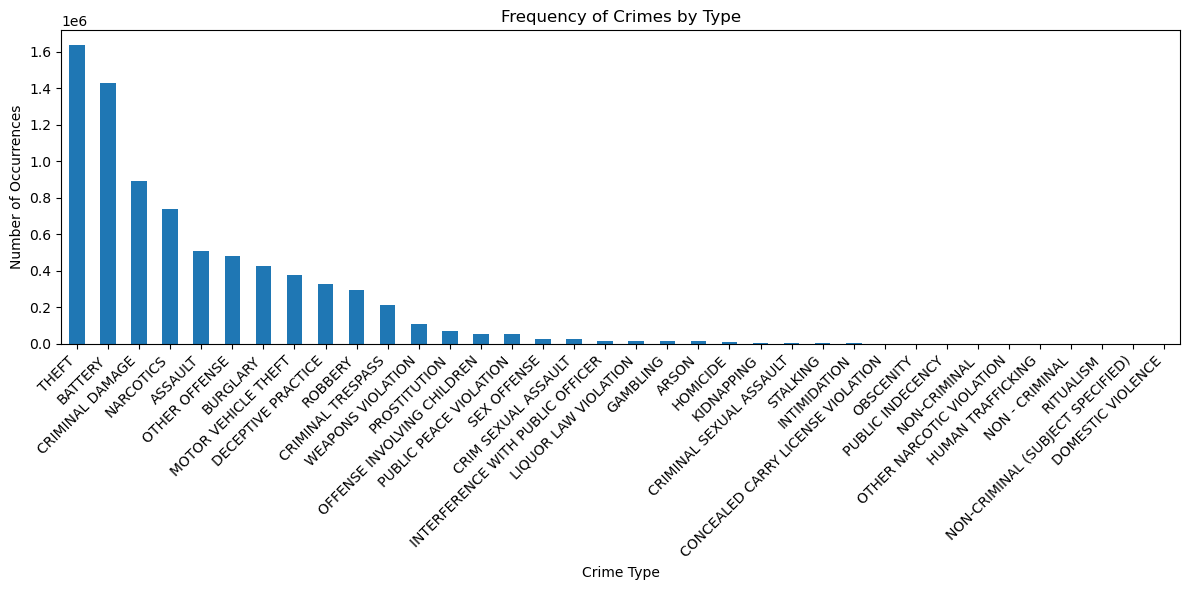

In [29]:
# Frequency by Type of Crime
plt.figure(figsize=(12,6))
df['Primary Type'].value_counts().plot(kind='bar')
plt.title('Frequency of Crimes by Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


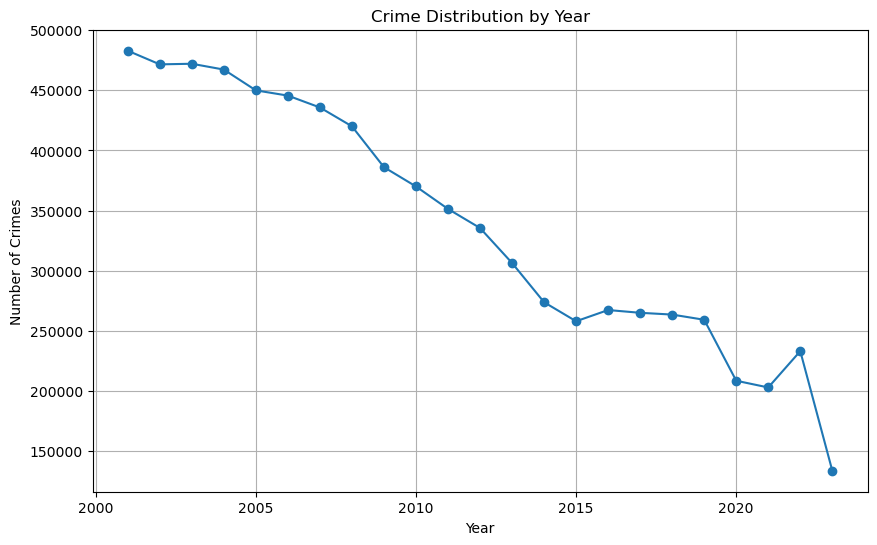

In [31]:
# Crime Distribution by Year
plt.figure(figsize=(10,6))
df.groupby('Year').size().plot(kind='line', marker='o')
plt.title('Crime Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


In [33]:
# Create a new 'Severity' column
def classify_severity(crime_type):
    violent_crimes = ['ASSAULT', 'BATTERY', 'HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY']
    if crime_type in violent_crimes:
        return 'Violent Crime'
    else:
        return 'Non-Violent Crime'

df['Severity'] = df['Primary Type'].apply(classify_severity)


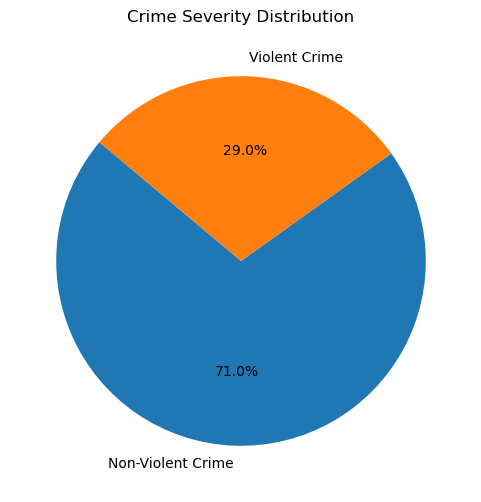

In [35]:
# Crime Severity Type
plt.figure(figsize=(6,6))
df['Severity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Crime Severity Distribution')
plt.ylabel('')
plt.show()


In [39]:
# Pivot: Crime Type vs Arrests
pivot_table = df.pivot_table(values='ID', index='Primary Type', columns='Arrest', aggfunc='count')
print(pivot_table)


Arrest                                 False     True 
Primary Type                                          
ARSON                                11647.0    1650.0
ASSAULT                             402635.0  107944.0
BATTERY                            1114025.0  313531.0
BURGLARY                            400181.0   24251.0
CONCEALED CARRY LICENSE VIOLATION       40.0    1076.0
CRIM SEXUAL ASSAULT                  22014.0    4106.0
CRIMINAL DAMAGE                     830307.0   59544.0
CRIMINAL SEXUAL ASSAULT               5896.0     422.0
CRIMINAL TRESPASS                    64407.0  149904.0
DECEPTIVE PRACTICE                  284085.0   46005.0
DOMESTIC VIOLENCE                        NaN       1.0
GAMBLING                                96.0   14427.0
HOMICIDE                              6722.0    6001.0
HUMAN TRAFFICKING                       81.0      10.0
INTERFERENCE WITH PUBLIC OFFICER      1466.0   16976.0
INTIMIDATION                          3978.0     713.0
KIDNAPPING

In [53]:
# Pivot Table: Number of crimes by crime type and arrest status
pivot_table = df_filtered.pivot_table(values='ID', index='Primary Type', columns='Arrest', aggfunc='count')

# Display it
print(pivot_table)


Arrest         False  True 
Primary Type               
BATTERY       318021  74602
THEFT         427939  39848
